In [1]:
%matplotlib inline
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Activation
from keras.utils import to_categorical
import matplotlib.pyplot as plt

##  Load the dataset

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 171s 1us/step


In [7]:
print('Train set size : ', X_train.shape[0])
print('Test set size : ', X_test.shape[0])

Train set size :  50000
Test set size :  10000


## Looking at a random image in dataset

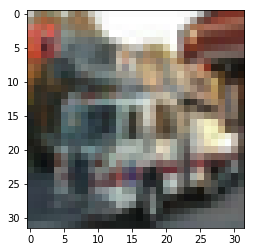

In [10]:
plt.imshow(X_train[900])

In [6]:
print("The given image has", y_train[900])

The given image has [9]


## Flattening the pixel values into 1D array

In [11]:
X_train = X_train.reshape((50000,-1)) /255.0
X_test = X_test.reshape((X_test.shape[0],-1)) /255.0

In [12]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [13]:
print("Shape of X_train after flattening:", X_train.shape)
print("Shape of y_train after one-hot encoding:", y_train.shape)

Shape of X_train after flattening: (50000, 3072)
Shape of y_train after one-hot encoding: (50000, 10)


## Defining a neural net with 2 hidden layers each having 128 neurons

In [18]:
model = Sequential([Dense(128, input_shape=(3072,)),
                     Activation('relu'),
                    Dense(128),
                     Activation('relu'),
                     Dense(10),
                     Activation('softmax')])

## Compiling the model

In [19]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

## Fit the model - train it for 2 iterations

In [20]:
model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split=0.25)

Train on 37500 samples, validate on 12500 samples
Epoch 1/2
37500/37500 [==============================] - 351s 9ms/step - loss: 1.9523 - acc: 0.2972 - val_loss: 1.9067 - val_acc: 0.3085
Epoch 2/2
37500/37500 [==============================] - 11s 302us/step - loss: 1.7617 - acc: 0.3661 - val_loss: 1.7339 - val_acc: 0.3698


## Evaluate

In [21]:
training_scores = model.evaluate(X_train, y_train)
test_scores = model.evaluate(X_test, y_test)
print("Training accuracy: {:.2f}%".format(training_scores[1]*100))
print("Test accuracy: {:.2f}%".format(test_scores[1]*100))

10000/10000 [==============================] - 6s 634us/step
Training accuracy: 38.46%
Test accuracy: 38.48%
